In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

**Lọc trung bình số học**

Lọc làm mịn đơn giản, làm mờ để loại nhiễu

In [ ]:
def Loc_Trung_binh_so_hoc(img, ksize): # ksize là giá trị được cho trước
    m, n = img.shape 
    img_ket_qua_anh_loc = np.zeros([m, n]) #ma trận ảnh sau khi lọc
    h=(ksize -1) // 2 #tính slg h pixel cần thêm vào lề
    padded_img = np.pad(img, (h, h), mode='reflect') # thêm lề vào ảnh
    #duyệt các giá trị pixel của ảnh
    for i in range(m):
        for j in range(n):
            vung_anh_kich_thuoc_k = padded_img[i:i+ksize,j:j+ksize] # tạo khung k
            img_ket_qua_anh_loc[i,j] = np.mean(vung_anh_kich_thuoc_k) # tính trung bình
    return img_ket_qua_anh_loc

def show_Loc_Trung_binh_so_hoc():
    img_nhieu = cv2.imread('Anh_nhieu_de_loc_Trung_binh.tif', 0)
    ksize =5
    img_ket_qua_TBSH = Loc_Trung_binh_so_hoc(img_nhieu,ksize)

    fig = plt.figure(figsize=(16, 9))     # Thiết lập vùng (cửa sổ) vẽ
    (ax1, ax2) = fig.subplots(1, 2)        # Thiết lập 2 vùng con ax1, ax2
    ax1.imshow(img_nhieu, cmap='gray')      # Hiển thị ảnh gốc vùng ax1
    ax1.set_title("ảnh gốc bị nhiễu Gaussian")             # Thiết lập tiêu đề vùng ax1
    ax1.axis("off")

    ax2.imshow(img_ket_qua_TBSH, cmap='gray')       # Hiển thị ảnh sau khi lọc
    ax2.set_title("ảnh sau khi lọc Trung bình số học") # Thiết lập tiêu đề vùng ax2
    ax2.axis("off")

    plt.show()

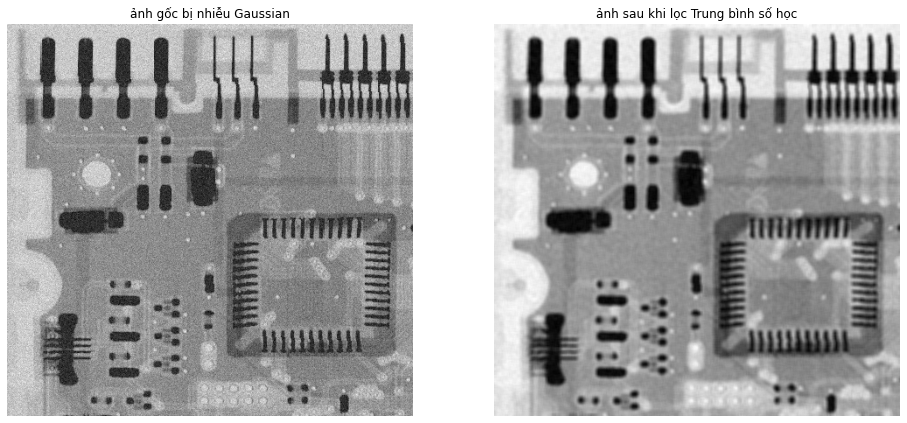

In [ ]:
show_Loc_Trung_binh_so_hoc()

**Lọc trung bình Contraharmonic**

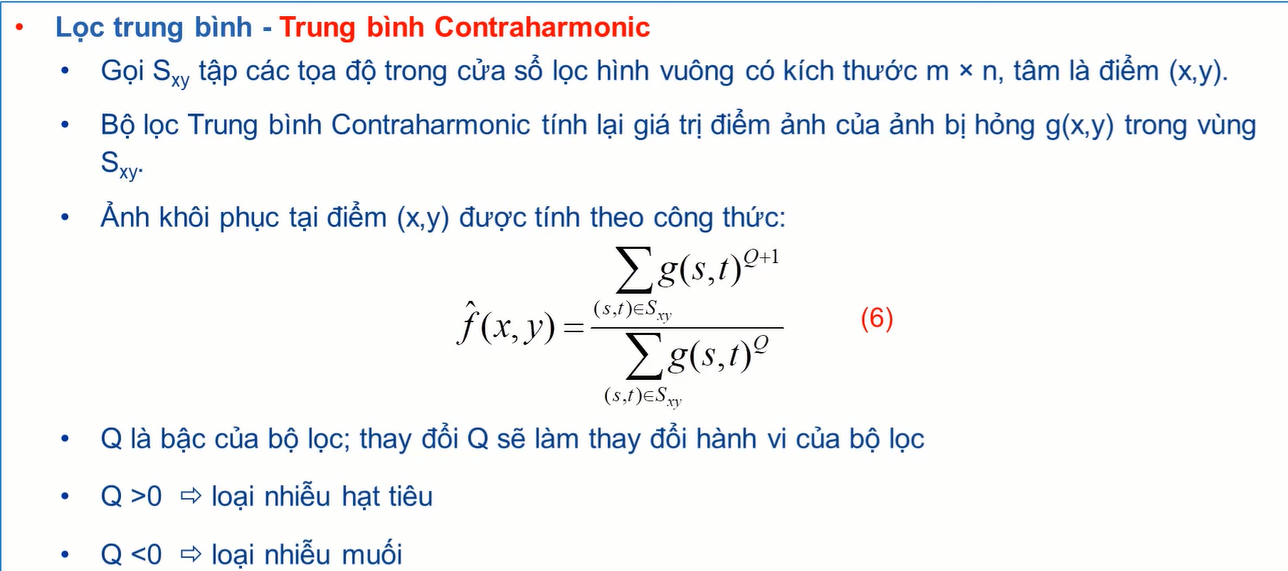


In [ ]:
def Loc_Trung_binh_Contraharmonic(img, ksize,Q):
    m, n = img.shape
    img_ket_qua_anh_loc = np.zeros([m, n])

    h=(ksize -1) // 2
    padded_img = np.pad(img, (h, h), mode='reflect') #tạo lề cho ảnh
    padded_img_bac_Q_cong_1 = np.power(padded_img, Q+1) #tính ảnh có lề bậc Q+1
    padded_img_bac_Q = np.power(padded_img, Q) #tính ảnh có lề bậc Q

    for i in range(m):
        for j in range(n):
            vung_anh_kich_thuoc_k_bac_Q_cong_1 = padded_img_bac_Q_cong_1[i:i+ksize,j:j+ksize] #tạo vùng ảnh kích thước k bậc Q+1 dạng [0:3, 0:3] ....
            vung_anh_kich_thuoc_k_bac_Q = padded_img_bac_Q[i:i + ksize, j:j + ksize]
            img_bac_Q_1 = np.sum(vung_anh_kich_thuoc_k_bac_Q_cong_1) #tính tổng bậc Q+1
            img_bac_Q = np.sum(vung_anh_kich_thuoc_k_bac_Q) #tính tổng bậc Q
            gia_tri_loc = img_bac_Q_1/img_bac_Q #chia tỉ lệ theo công thức
            img_ket_qua_anh_loc[i, j] = gia_tri_loc
    return img_ket_qua_anh_loc

def show_Loc_Trung_binh_Contraharmonic():
    img_nhieu_hat_tieu = cv2.imread('Anh_nhieu_hat_tieu.tif', 0)
    img_nhieu_muoi = cv2.imread('Anh_nhieu_muoi.tif', 0)
    ksize =3
    Q1=1.5
    Q2 = -.8
    img_ket_qua_TBContraharmonic1=Loc_Trung_binh_Contraharmonic(img_nhieu_hat_tieu, ksize,Q1)
    img_ket_qua_TBContraharmonic2 = Loc_Trung_binh_Contraharmonic(img_nhieu_muoi, ksize, Q2)
    fig = plt.figure(figsize=(16, 9))     # Thiết lập vùng (cửa sổ) vẽ
    (ax1, ax2),(ax3,ax4) = fig.subplots(2, 2)        # Thiết lập 2 vùng con ax1, ax2
    ax1.imshow(img_nhieu_hat_tieu, cmap='gray')      # Hiển thị ảnh gốc vùng ax1
    ax1.set_title("ảnh gốc bị nhiễu hạt tiêu")             # Thiết lập tiêu đề vùng ax1
    ax1.axis("off")

    ax2.imshow(img_ket_qua_TBContraharmonic1, cmap='gray')  # Hiển thị ảnh sau khi lọc
    ax2.set_title("ảnh sau khi lọc Trung bình Contraharmonic")  # Thiết lập tiêu đề vùng ax2
    ax2.axis("off")

    ax3.imshow(img_nhieu_muoi, cmap='gray')  # Hiển thị ảnh gốc vùng ax3
    ax3.set_title("ảnh gốc bị nhiễu muối")  # Thiết lập tiêu đề vùng ax3
    ax3.axis("off")

    ax4.imshow(img_ket_qua_TBContraharmonic2, cmap='gray')  # Hiển thị ảnh sau khi lọc
    ax4.set_title("ảnh sau khi lọc Trung bình Contraharmonic")  # Thiết lập tiêu đề vùng ax4
    ax4.axis("off")

    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in power
  


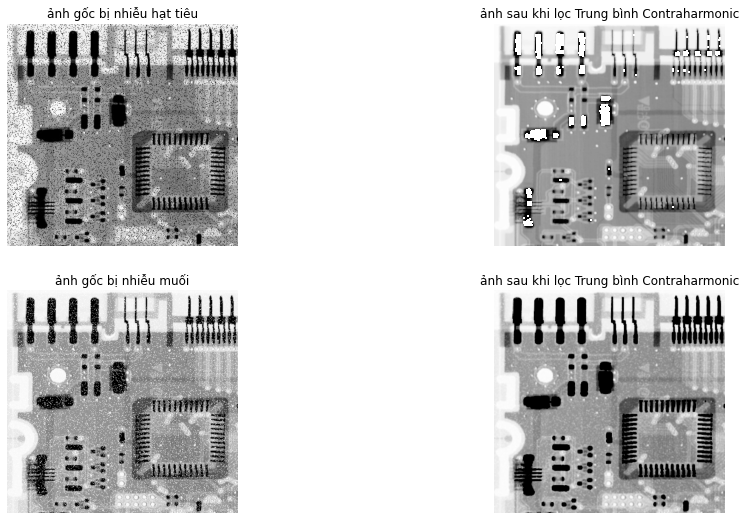

In [ ]:
show_Loc_Trung_binh_Contraharmonic()

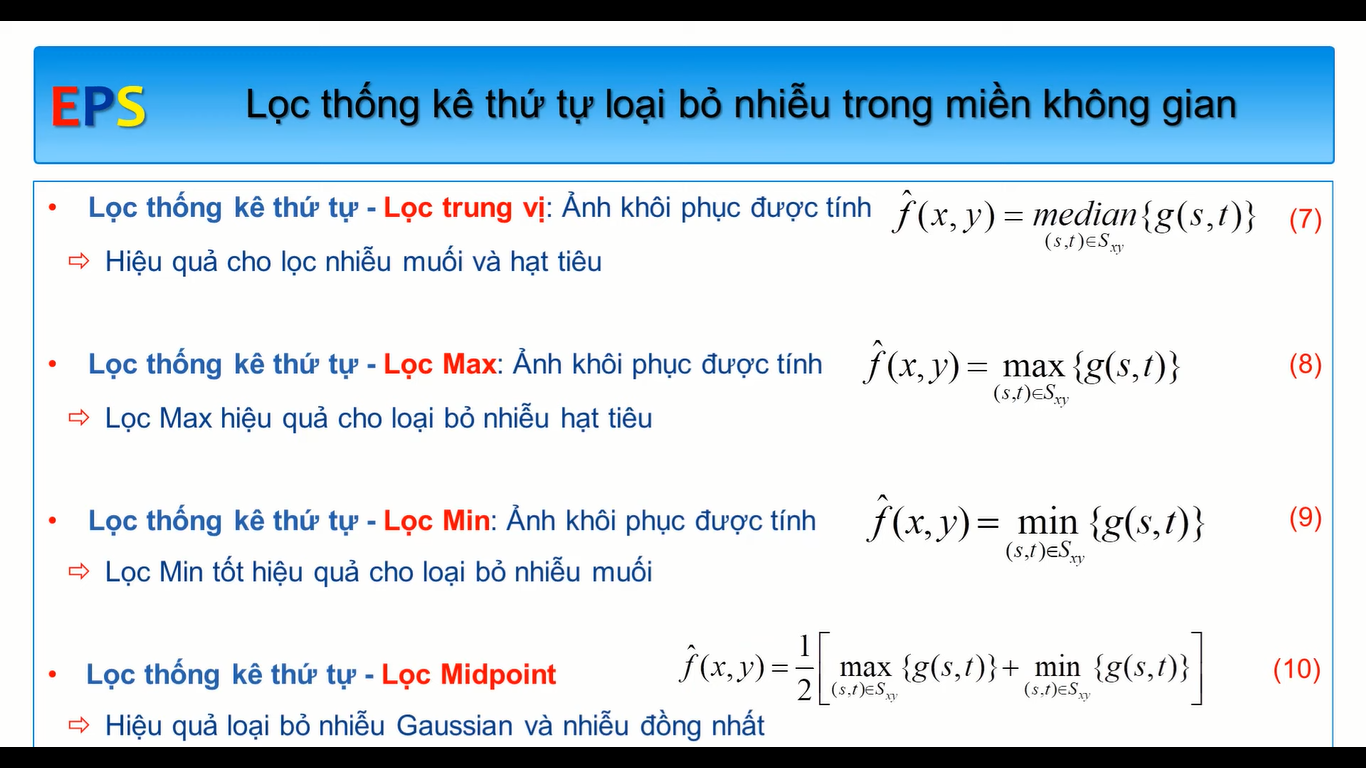

**Lọc Midpoint**

In [ ]:
def Loc_TKTT_Midpoint(img, ksize):
    m, n = img.shape
    img_ket_qua_anh_loc_Midpoint = np.zeros([m, n])
    h=(ksize -1) // 2
    padded_img = np.pad(img, (h, h), mode='reflect')
    for i in range(m):
        for j in range(n):
            vung_anh_kich_thuoc_k = padded_img[i:i+ksize,j:j+ksize]
            gia_tri_Max = np.max(vung_anh_kich_thuoc_k)
            gia_tri_Min = np.min(vung_anh_kich_thuoc_k)
            img_ket_qua_anh_loc_Midpoint[i, j] = (gia_tri_Max + gia_tri_Min)/2
    return img_ket_qua_anh_loc_Midpoint


def show_midpoint():

    img_nhieu_hat_tieu = cv2.imread('Anh_nhieu_hat_tieu.tif', 0)
    img_nhieu_muoi = cv2.imread('Anh_nhieu_muoi.tif', 0)
    img_nhieu_dong_nhat = cv2.imread('Anh_nhieu_DN_de_loc_MidPoint.tif', 0)
    ksize = 5 # Để lọc ảnh Midpoint
    alpha = 0.25

    img_KQ_MidPoint= Loc_TKTT_Midpoint(img_nhieu_dong_nhat , ksize)

    fig = plt.figure(figsize=(16, 9))     # Thiết lập vùng (cửa sổ) vẽ
    (ax1, ax2) = fig.subplots(1, 2)        # Thiết lập 2 vùng con ax1, ax2
    ax1.imshow(img_nhieu_dong_nhat, cmap='gray')      # Hiển thị ảnh gốc vùng ax1
    ax1.set_title("ảnh gốc bị nhiễu đồng nhất")             # Thiết lập tiêu đề vùng ax1
    ax1.axis("off")

    ax2.imshow(img_KQ_MidPoint, cmap='gray')       # Hiển thị ảnh sau khi lọc
    ax2.set_title("ảnh sau khi lọc MidPoint") # Thiết lập tiêu đề vùng ax2
    ax2.axis("off")

    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveShellApp.init_path()


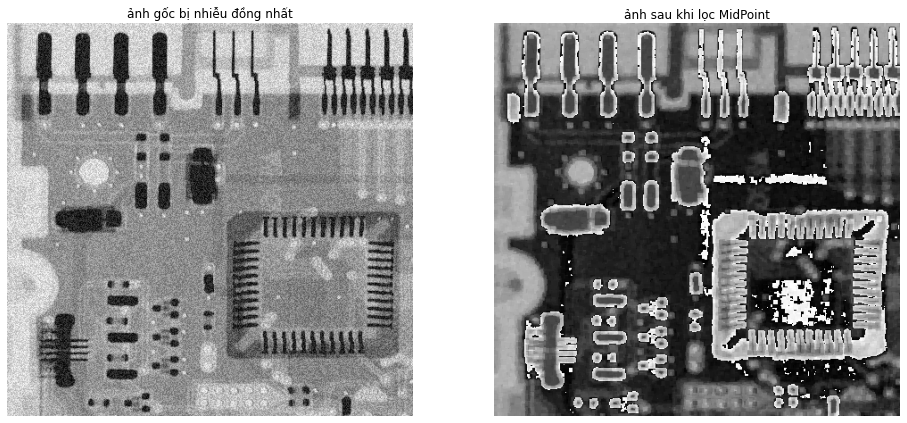

In [ ]:
show_midpoint()

**Khôi phục ảnh lọc min, max, trung vị**

In [ ]:

def Loc_TKTT_max(img, ksize):
    m, n = img.shape
    img_ket_qua_anh_loc_max = np.zeros([m, n])
    h=(ksize -1) // 2
    padded_img = np.pad(img, (h, h), mode='reflect')
    for i in range(m):
        for j in range(n):
            vung_anh_kich_thuoc_k = padded_img[i:i+ksize,j:j+ksize]
            gia_tri_Max = np.max(vung_anh_kich_thuoc_k)
            img_ket_qua_anh_loc_max[i, j] = gia_tri_Max
    return img_ket_qua_anh_loc_max

def Loc_TKTT_min(img, ksize):
    m, n = img.shape
    img_ket_qua_anh_loc_min = np.zeros([m, n])
    h=(ksize -1) // 2
    padded_img = np.pad(img, (h, h), mode='reflect')
    for i in range(m):
        for j in range(n):
            vung_anh_kich_thuoc_k = padded_img[i:i+ksize,j:j+ksize]
            gia_tri_Min = np.min(vung_anh_kich_thuoc_k)
            img_ket_qua_anh_loc_min[i, j] = gia_tri_Min
    return img_ket_qua_anh_loc_min

def Loc_TKTT_trung_vi(img, ksize):
    m, n = img.shape
    img_ket_qua_anh_loc_Trung_vi= np.zeros([m, n])
    h=(ksize -1) // 2
    padded_img = np.pad(img, (h, h), mode='reflect')
    for i in range(m):
        for j in range(n):
            vung_anh_kich_thuoc_k = padded_img[i:i+ksize,j:j+ksize]
            gia_tri_TV = np.median(vung_anh_kich_thuoc_k)
            img_ket_qua_anh_loc_Trung_vi[i, j] = gia_tri_TV
    return img_ket_qua_anh_loc_Trung_vi

def show_minmax():

    img_nhieu_hat_tieu = cv2.imread('Anh_nhieu_hat_tieu.tif', 0)
    img_nhieu_muoi = cv2.imread('Anh_nhieu_muoi.tif', 0)
    img_nhieu_muoi_tieu = cv2.imread('Anh_nhieu_de_loc_Trung_vi.tif', 0)
    ksize_1 = 3 # Để lọc ảnh nhiễu muối, ảnh nhiễu hạt tiêu
    ksize_2 =7  # Để lọc ảnh nhiễu muối tiêu
    img_KQ_Max = Loc_TKTT_max(img_nhieu_hat_tieu, ksize_1)
    img_KQ_Min = Loc_TKTT_min(img_nhieu_muoi, ksize_1)
    img_KQ_Trung_vi= Loc_TKTT_trung_vi(img_nhieu_muoi_tieu , ksize_2)

    fig = plt.figure(figsize=(16, 9))     # Thiết lập vùng (cửa sổ) vẽ
    (ax1, ax2), (ax3,ax4),(ax5,ax6) = fig.subplots(3, 2)        # Thiết lập 2 vùng con ax1, ax2
    ax1.imshow(img_nhieu_hat_tieu, cmap='gray')      # Hiển thị ảnh gốc vùng ax1
    ax1.set_title("ảnh gốc bị nhiễu hạt tiêu")             # Thiết lập tiêu đề vùng ax1
    ax1.axis("off")

    ax2.imshow(img_KQ_Max, cmap='gray')       # Hiển thị ảnh sau khi lọc
    ax2.set_title("ảnh sau khi lọc TKTT Max") # Thiết lập tiêu đề vùng ax2
    ax2.axis("off")

    ax3.imshow(img_nhieu_muoi, cmap='gray')  # Hiển thị ảnh sau khi lọc
    ax3.set_title("ảnh gốc bị nhiễu muối")  # Thiết lập tiêu đề vùng ax2
    ax3.axis("off")

    ax4.imshow(img_KQ_Min, cmap='gray')  # Hiển thị ảnh sau khi lọc
    ax4.set_title("ảnh sau khi lọc TKTT Min")  # Thiết lập tiêu đề vùng ax2
    ax4.axis("off")

    ax5.imshow(img_nhieu_muoi_tieu, cmap='gray')  # Hiển thị ảnh sau khi lọc
    ax5.set_title("ảnh gốc bị nhiễu muối tiêu")  # Thiết lập tiêu đề vùng ax2
    ax5.axis("off")

    ax6.imshow(img_KQ_Trung_vi, cmap='gray')  # Hiển thị ảnh sau khi lọc
    ax6.set_title("ảnh sau khi lọc Trung vị")  # Thiết lập tiêu đề vùng ax2
    ax6.axis("off")
    plt.show()

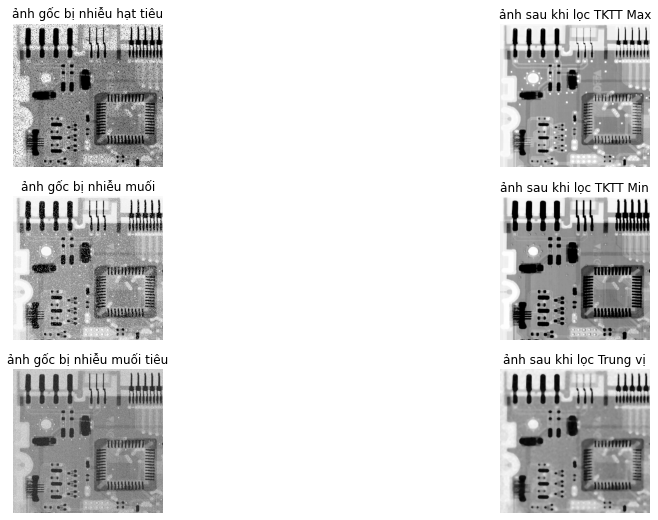

In [ ]:
show_minmax()